# Financial Application, Part-1

## S&P-500 Index Prices Forecast

#### It is a training example of forecasting the S&P 500 Index at the prices of the previous minute of all shares included in this Index. The value of the Index is predicted for the next minute following the current minute.
#### A multilayer perceptron (MLP) Neural network with fully connected layers (dense) is used.
#### The dataset consists of the Index (outputs) and stock prices (inputs) for five months of 2017 of the S&P 500 constituents.

#### The S&P-500 (S&P) is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. The weight of each company in the index is proportional to its capitalization (more precisely, free-float)

#### "S&P-500 Index": (https://en.wikipedia.org/wiki/S%26P_500_Index)

#### ! Note that this notebook is a hands-on tutorial on machine learning in Finance. Live forecasting of stock prices is a challenging and complex task that requires tremendous effort, especially at higher frequencies, such as the one-minute timeframe used here.

##### **Source** - paper "A simple deep learning model for stock price prediction using TensorFlow":
(https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877).

3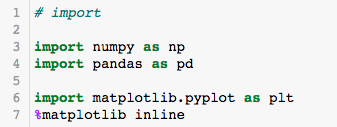

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

4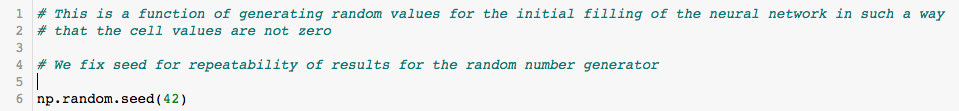

In [2]:
np.random.seed(42)
print(np.random.seed(42))

None


### Dataset

7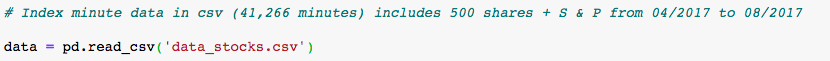

In [3]:
data = pd.read_csv('data_stocks.csv')

8

In [4]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


9

In [5]:
data.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


10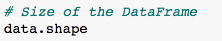

In [6]:
data.shape

(41266, 502)

(41266, 502)

11

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [ ]:
# We have 501 float64 and one int64 variables. All data are numerical!

12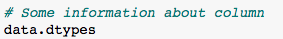

In [8]:
data.dtypes

DATE             int64
SP500          float64
NASDAQ.AAL     float64
NASDAQ.AAPL    float64
NASDAQ.ADBE    float64
                ...   
NYSE.XRX       float64
NYSE.XYL       float64
NYSE.YUM       float64
NYSE.ZBH       float64
NYSE.ZTS       float64
Length: 502, dtype: object

DATE             int64
SP500          float64
NASDAQ.AAL     float64
NASDAQ.AAPL    float64
NASDAQ.ADBE    float64
                ...   
NYSE.XRX       float64
NYSE.XYL       float64
NYSE.YUM       float64
NYSE.ZBH       float64
NYSE.ZTS       float64
Length: 502, dtype: object

In [11]:
# so we have 500 prices of shares and a price of the Index for each minute

13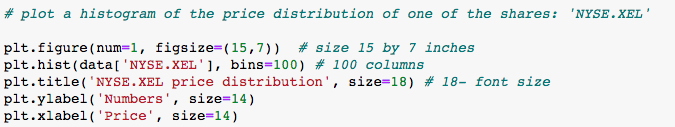

Text(0.5, 0, 'Price')

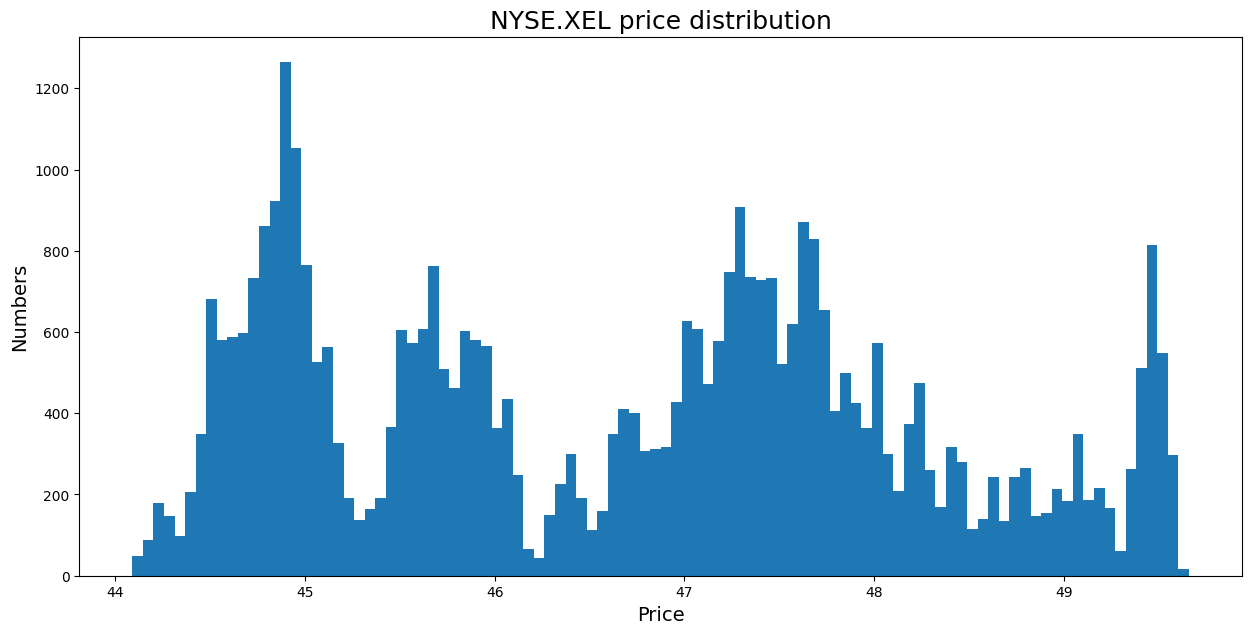

In [9]:
plt.figure(num=1, figsize=(15,7))
plt.hist(data['NYSE.XEL'], bins=100)
plt.title('NYSE.XEL price distribution', size=18)
plt.ylabel('Numbers', size=14)
plt.xlabel('Price', size=14)

Text(0.5, 0, 'Price')

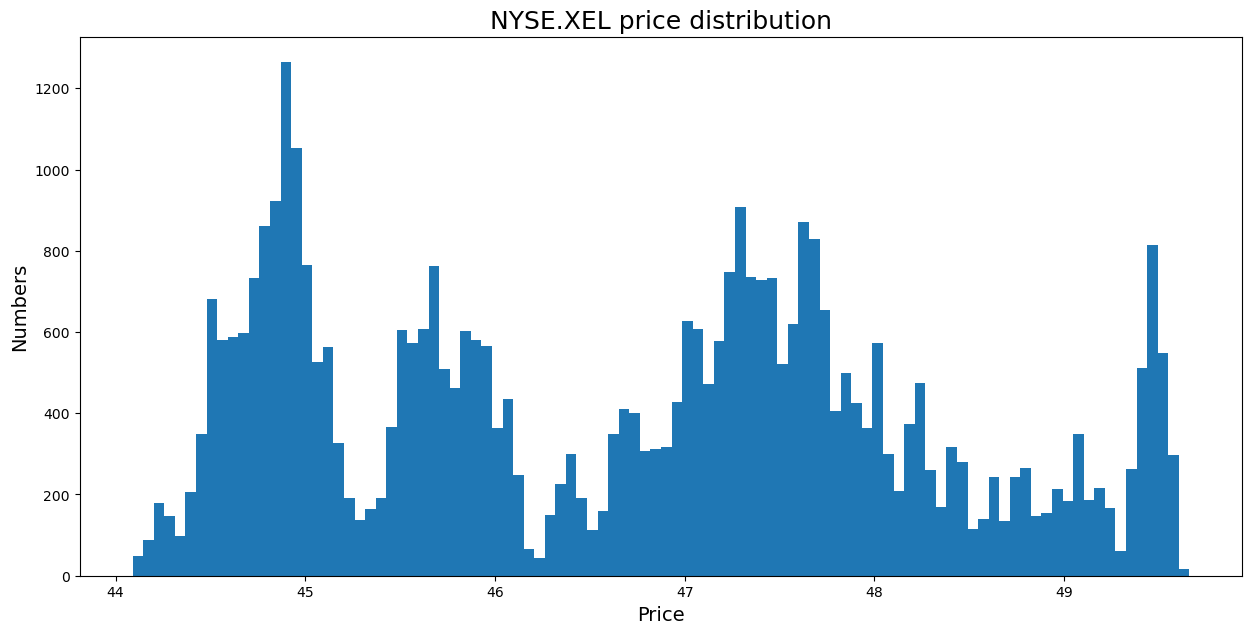

14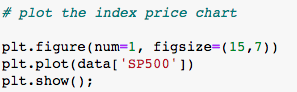

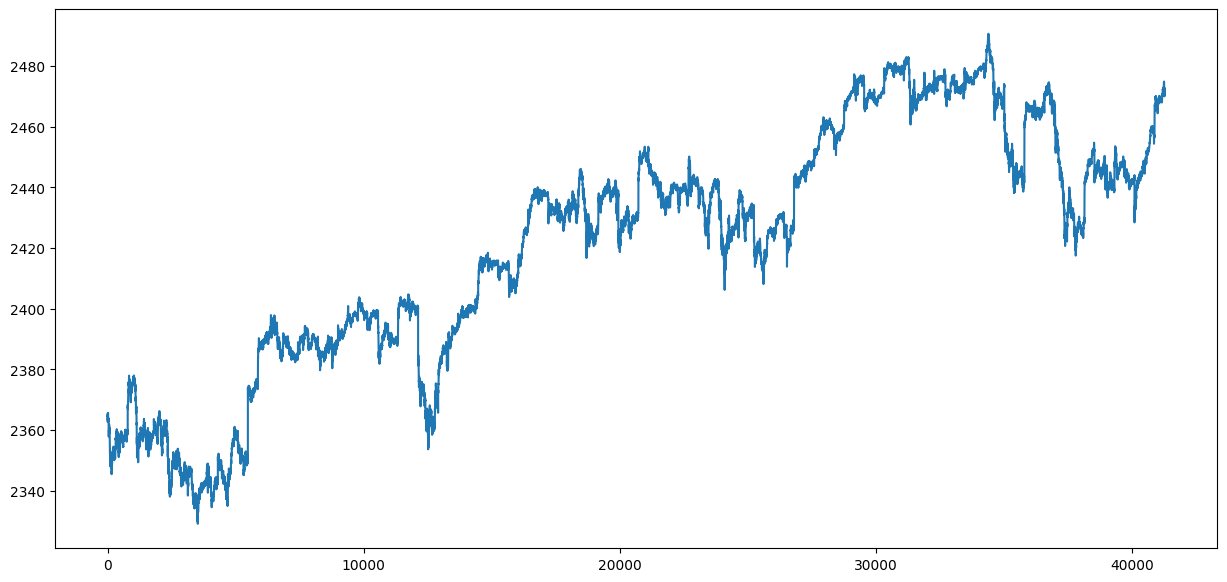

In [10]:
plt.figure(num=1, figsize=(15,7))
plt.plot(data['SP500'])
plt.show()

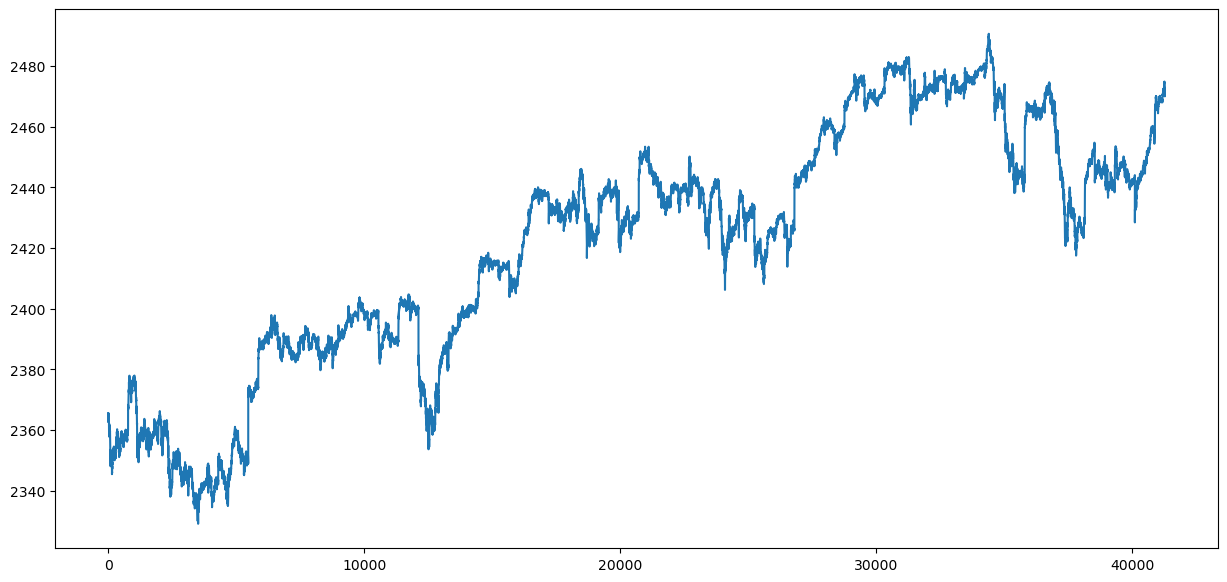

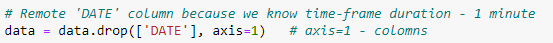

In [11]:
data = data.drop(['DATE'], axis=1)

16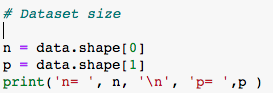

In [12]:
n = data.shape[0]
p = data.shape[1]

print('n=', n, '\n', 'p=', p)

n= 41266 
 p= 501


 n=  41266 
 p=  501


17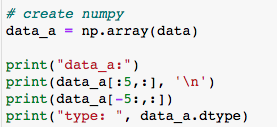

In [13]:
data_a = np.array(data)
print("data_a:")
print(data_a[:5, :], '\n')
print(data_a[-5:,:])
print("type:", data_a.dtype)

data_a:
[[2363.6101   42.33    143.68   ...   63.86    122.       53.35  ]
 [2364.1001   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2362.6799   42.31    143.6901 ...   63.75    121.7      53.365 ]
 [2364.3101   42.37    143.64   ...   63.88    121.7      53.38  ]
 [2364.8501   42.5378  143.66   ...   63.91    121.695    53.24  ]] 

[[2472.22     44.72    164.11   ...   76.88    114.31     62.725 ]
 [2471.77     44.73    164.12   ...   76.9     114.33     62.71  ]
 [2470.03     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]
type: float64


data_a:
[[2363.6101   42.33    143.68   ...   63.86    122.       53.35  ]
 [2364.1001   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2362.6799   42.31    143.6901 ...   63.75    121.7      53.365 ]
 [2364.3101   42.37    143.64   ...   63.88    121.7      53.38  ]
 [2364.8501   42.5378  143.66   ...   63.91    121.695    53.24  ]] 

[[2472.22     44.72    164.11   ...   76.88    114.31     62.725 ]
 [2471.77     44.73    164.12   ...   76.9     114.33     62.71  ]
 [2470.03     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]
type:  float64


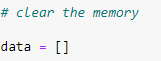

In [14]:
data = []

19

In [15]:
data

[]

[]

##### The aim is to forecast the S&P-500 index prices soon (in our example, the S&P-500 price in the next minute).  
##### This aim requires data preprocessing. First, shift the S&P-500 forward one minute.

20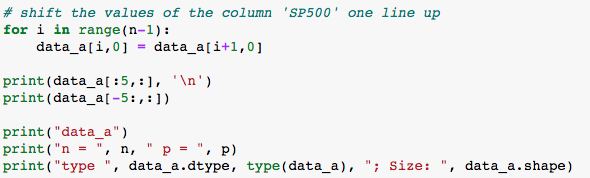

In [16]:
for i in range(n-1):
    data_a[i,0] = data_a[i+1, 0]

print(data_a[:5,:], '\n')
print(data_a[-5:, :])

print("data_a")
print("n =", n, "p =", p)
print("type", data_a.dtype, type(data_a), "; Size: ", data_a.shape)

[[2364.1001   42.33    143.68   ...   63.86    122.       53.35  ]
 [2362.6799   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2364.3101   42.31    143.6901 ...   63.75    121.7      53.365 ]
 [2364.8501   42.37    143.64   ...   63.88    121.7      53.38  ]
 [2365.6201   42.5378  143.66   ...   63.91    121.695    53.24  ]] 

[[2471.77     44.72    164.11   ...   76.88    114.31     62.725 ]
 [2470.03     44.73    164.12   ...   76.9     114.33     62.71  ]
 [2471.49     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]
data_a
n = 41266 p = 501
type float64 <class 'numpy.ndarray'> ; Size:  (41266, 501)


[[2364.1001   42.33    143.68   ...   63.86    122.       53.35  ]
 [2362.6799   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2364.3101   42.31    143.6901 ...   63.75    121.7      53.365 ]
 [2364.8501   42.37    143.64   ...   63.88    121.7      53.38  ]
 [2365.6201   42.5378  143.66   ...   63.91    121.695    53.24  ]] 

[[2471.77     44.72    164.11   ...   76.88    114.31     62.725 ]
 [2470.03     44.73    164.12   ...   76.9     114.33     62.71  ]
 [2471.49     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]
data_a
n =  41266  p =  501
type  float64 <class 'numpy.ndarray'> ; Size:  (41266, 501)


In [20]:
# compare with previous numpy array 
# is the upward shift correct?

In [17]:
print("Previous data_a (before upward shift):")
print(data_a[:5,:], '\n')

print("Current data_a (after upward shift):")
print(data_a[:-1,:5], '\n')


Previous data_a (before upward shift):
[[2364.1001   42.33    143.68   ...   63.86    122.       53.35  ]
 [2362.6799   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2364.3101   42.31    143.6901 ...   63.75    121.7      53.365 ]
 [2364.8501   42.37    143.64   ...   63.88    121.7      53.38  ]
 [2365.6201   42.5378  143.66   ...   63.91    121.695    53.24  ]] 

Current data_a (after upward shift):
[[2364.1001   42.33    143.68    129.63     82.04  ]
 [2362.6799   42.36    143.7     130.32     82.08  ]
 [2364.3101   42.31    143.6901  130.225    82.03  ]
 ...
 [2470.03     44.73    164.12    155.16     83.65  ]
 [2471.49     44.74    164.01    155.065    83.62  ]
 [2471.49     44.71    163.88    154.96     83.58  ]] 



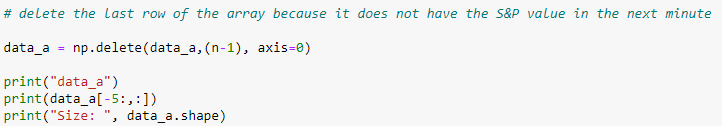

In [18]:
data_a = np.delete(data_a, (n-1), axis=0)

print(f"data_a")
print(data_a[-5:,:])
print(f"Size: ", data_a.shape)

data_a
[[2472.22     44.71    164.14   ...   76.885   114.3      62.73  ]
 [2471.77     44.72    164.11   ...   76.88    114.31     62.725 ]
 [2470.03     44.73    164.12   ...   76.9     114.33     62.71  ]
 [2471.49     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]]
Size:  (41265, 501)


data_a
[[2472.22     44.71    164.14   ...   76.885   114.3      62.73  ]
 [2471.77     44.72    164.11   ...   76.88    114.31     62.725 ]
 [2470.03     44.73    164.12   ...   76.9     114.33     62.71  ]
 [2471.49     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]]
Size:  (41265, 501)


### Data for training and testing

22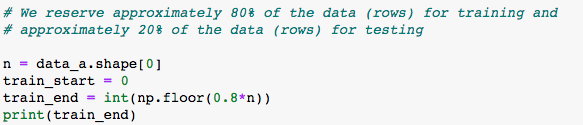

In [19]:
n = data_a.shape[0]
train_start = 0
train_end = int(np.floor(0.8 * n))
print(train_end)

33012


33012


23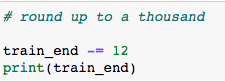

In [20]:
train_end -= 12
print(train_end)

33000


33000


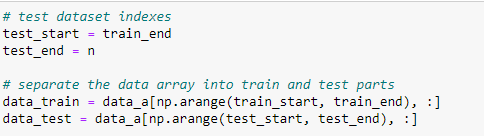

In [21]:
test_start = train_end
test_end = n - 1

data_train = data_a[np.arange(train_start, train_end), :]
data_test = data_a[np.arange(test_start, test_end), :]


25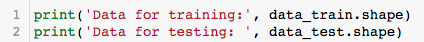

In [22]:
print(f'Data for training {data_train.shape}')
print(f'Data for testing {data_test.shape}')

Data for training (33000, 501)
Data for testing (8264, 501)


Data for training: (33000, 501)
Data for testing:  (8265, 501)


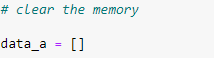

In [23]:
data_a = []

27

In [24]:
data_a 

[]

[]

### Data normalisation

28

In [25]:
from sklearn.preprocessing import MinMaxScaler

29

In [26]:
scaler = MinMaxScaler()

#### !!! Note:
A typical mistake when choosing a part of the data and time for scaling is to scale the entire dataset before it is divided into test and training data. It is a mistake because scaling starts the calculation of statistics, that is, minima/maxima of variables. When realising time series forecasting in real life, at the time of their generation, you cannot have information from observations in the future. Therefore, statistics should be calculated on the training data, and then the result should be applied to the test data. Otherwise, by taking information “from the future” to generate predictions (that is, from a test sample), the model will produce forecasts with “system bias.”

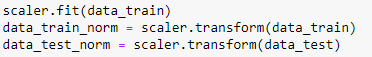

In [27]:
scaler.fit(data_train)
data_train_norm = scaler.transform(data_train)
data_test_norm = scaler.transform(data_test)

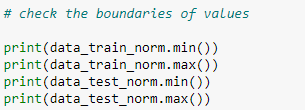

In [28]:
print(data_train_norm.min())
print(data_train_norm.max())
print(data_test_norm.min())
print(data_test_norm.max())

0.0
1.0000000000000018
-1.7208737864077674
2.115201718054915


0.0
1.0000000000000018
-1.7208737864077674
2.115201718054915


#### Create a matrix of input parameters and a outputs vector for training and test parts

In [30]:
# create two data sets: for training: (X_train, y_train)
# and for tests: (X_test, y_test)
# X_train and X_test are arrays with minute time-frame stock prices
# y_train and y_test are S&P-500 values in the next minute

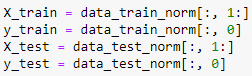

In [29]:
X_train = data_train_norm[:, 1:]
y_train = data_train_norm[:, 0]
X_test = data_test_norm[:, 1:]
y_test = data_test_norm[:, 0]

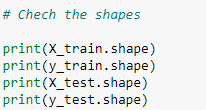

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33000, 500)
(33000,)
(8264, 500)
(8264,)


(33000, 500)
(33000,)
(8265, 500)
(8265,)


### Neural Network

35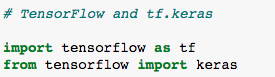

In [31]:
import tensorflow as tf
from tensorflow import keras

36

In [32]:
print(tf.__version__)

2.15.0


2.15.0


Number of input neurons = Number of stocks for training = 500
- Model (Neural network) consists of FOUR hidden levels:
 - The first contains 1024 neurons, which is slightly more than twice the amount of input data
 - The subsequent hidden levels are half the previous level: 512, 256 and 128 neurons
 - Reducing the number of neurons at each level compresses the information that the network processed at previous levels
 - output layer - ONE neuron (predicted S&P price) - this is a regression task

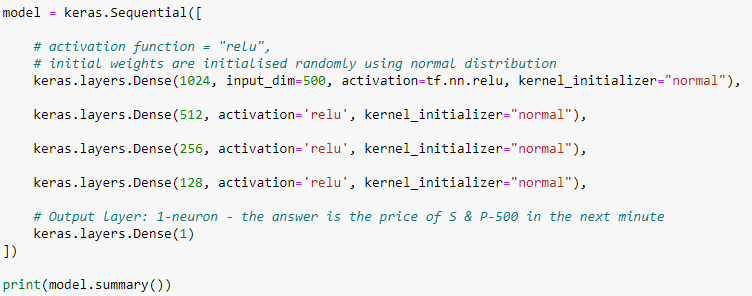

In [33]:
model = keras.Sequential([
    keras.layers.Dense(1024, input_dim=500, activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.Dense(512,  activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(256,  activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(128,  activation='relu', kernel_initializer='normal'),

    keras.layers.Dense(1)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              513024    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1202177 (4.59 MB)
Trainable params: 1202177 (4.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              513024    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1202177 (4.59 MB)
Trainable params: 1202177 (4.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


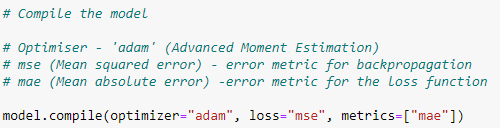

In [34]:
model.compile(optimizer='adam', loss='mse', metrics=["mae"])

### Training the Neural Network

#### <font color='red'>!!! If neural network training is slow and you spend more than one minute on one epoch, restart the Kernel, reduce the number of epochs to 10, and run again.</font>

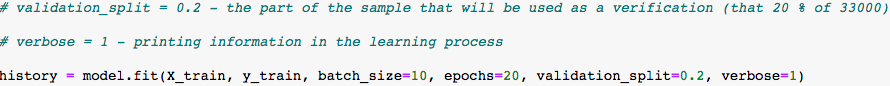

In [35]:
history = model.fit(X_train, y_train, batch_size=10, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
2640/2640 [==============================] - 26s 10ms/step - loss: 0.0034 - mae: 0.0188 - val_loss: 0.0092 - val_mae: 0.0867
Epoch 2/20
2640/2640 [==============================] - 29s 11ms/step - loss: 2.5999e-04 - mae: 0.0122 - val_loss: 0.0154 - val_mae: 0.1166
Epoch 3/20
2640/2640 [==============================] - 28s 10ms/step - loss: 1.6809e-04 - mae: 0.0099 - val_loss: 0.0013 - val_mae: 0.0298
Epoch 4/20
2640/2640 [==============================] - 27s 10ms/step - loss: 1.3016e-04 - mae: 0.0086 - val_loss: 0.0042 - val_mae: 0.0597
Epoch 5/20
2640/2640 [==============================] - 27s 10ms/step - loss: 9.9167e-05 - mae: 0.0076 - val_loss: 0.0033 - val_mae: 0.0521
Epoch 6/20
2640/2640 [==============================] - 27s 10ms/step - loss: 9.0498e-05 - mae: 0.0072 - val_loss: 0.0015 - val_mae: 0.0335
Epoch 7/20
2640/2640 [==============================] - 27s 10ms/step - loss: 8.2549e-05 - mae: 0.0068 - val_loss: 4.7760e-04 - val_mae: 0.0168
Epoch 8/20
2640/2640

### Evaluation

In [36]:
mse, mae = model.evaluate(X_test, y_test, verbose=1)

259/259 [==============================] - 0s 1ms/step - loss: 0.0021 - mae: 0.0395


259/259 [==============================] - 2s 5ms/step - loss: 0.0017 - mae: 0.0345


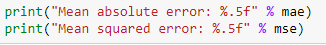

In [39]:
print("Mean absolute error: %.5f" % mae)
print("Mean squared error: %.5f" % mse)

Mean absolute error: 0.03946
Mean squared error: 0.00214


Mean absolute error: 0.03450
Mean squared error: 0.00166


### Training process graph

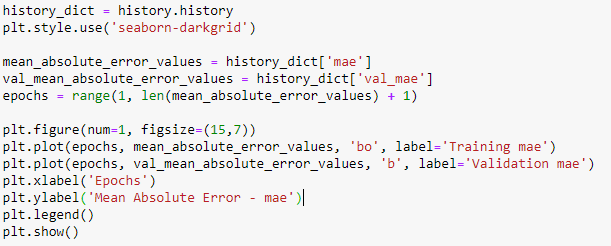

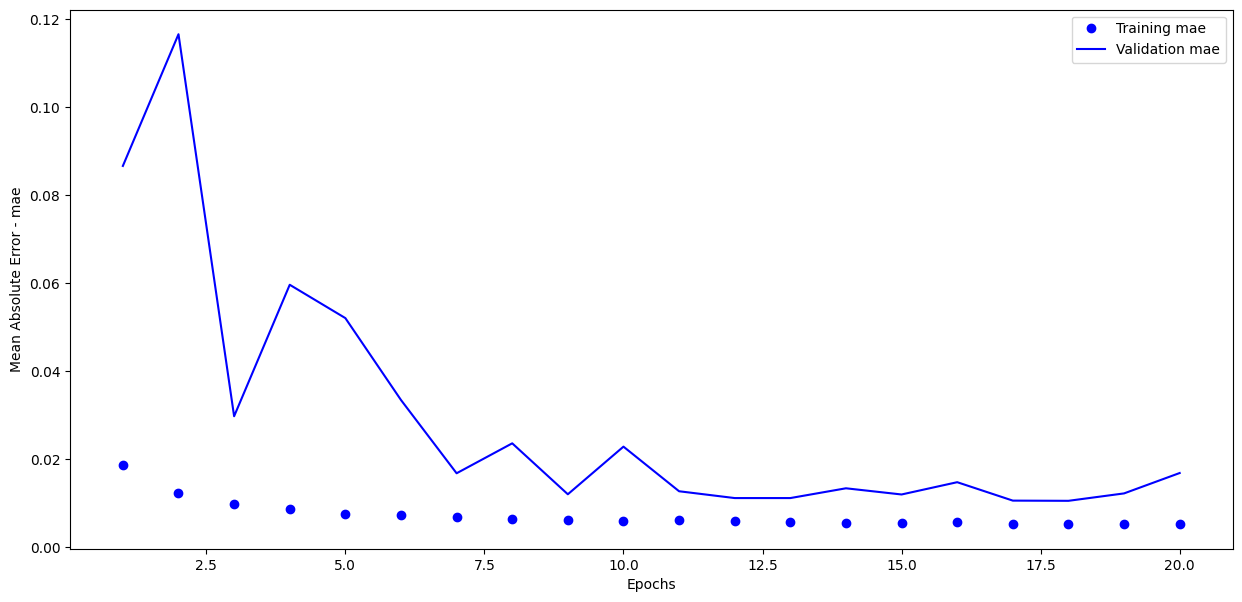

In [45]:
# !pip install seaborn

history_dict = history.history
# plt.style.use('seaborn-dark')

mean_absolute_error_values = history_dict['mae']
val_mean_absolute_error_values = history_dict['val_mae']
epochs = range(1, len(mean_absolute_error_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mae')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error - mae')
plt.legend()
plt.show()

### Using neural networks to predict the price of the S & P-500

In [43]:
# Based on the MinMaxScaler formula, let's calculate the parameters for restoring absolute prices from normalised ones.

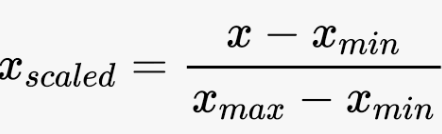

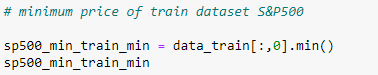

In [46]:
sp500_min_train_min = data_train[:,0].min()
sp500_min_train_min

2329.1399

2329.1399

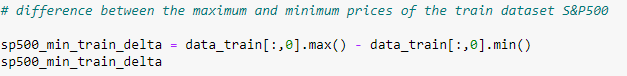

In [47]:
sp500_min_train_delta = data_train[:,0].max() - data_train[:, 0].min()
sp500_min_train_delta

153.73019999999997

153.73019999999997

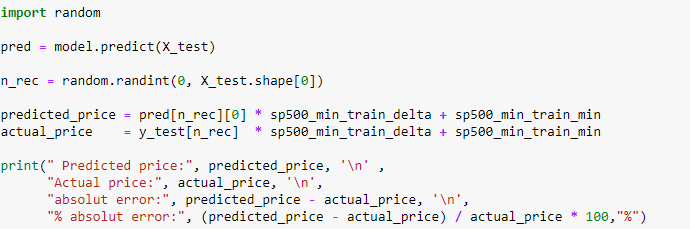

In [52]:
import random

pred = model.predict(X_test)

n_rec = random.randint(0, X_test.shape[0])

predicted_price = pred[n_rec][0] * sp500_min_train_delta + sp500_min_train_min
actual_price = y_test[n_rec] * sp500_min_train_delta + sp500_min_train_min

print("Predicted price: ", predicted_price, '\n', 
    "Actual price:", actual_price, '\n', 
    "absolut error", predicted_price - actual_price, '\n',
    "absolut error", (predicted_price - actual_price) / actual_price * 100
)

259/259 [==============================] - 0s 1ms/step
Predicted price:  2475.509114111936 
 Actual price: 2474.52 
 absolut error 0.9891141119360327 
 absolut error 0.03997195868031104


259/259 [==============================] - 1s 2ms/step
 Predicted price: 2452.0994224342826 
 Actual price: 2442.6499 
 absolut error: 9.449522434282699 
 % absolut error: 0.3868553751514983 %


In [47]:
# Run the previous cell several times and look at the results
# Describe the results in the cell below

In [ ]:
    # Predicted price: This value varies with each execution of the cell since it depends on a randomly chosen record from the test dataset.

    # Actual price: Similarly, this value changes with each execution as it corresponds to the price listed in the randomly chosen record from the test dataset.

    # Absolute error: It represents the difference between the predicted and actual prices. The magnitude of this error can be positive or negative, depending on whether the model predicted a price higher or lower than the actual price, respectively.

    # Percentage error: It's the absolute error expressed as a percentage of the actual price. It allows us to evaluate the relative accuracy of the prediction.

### Price chart

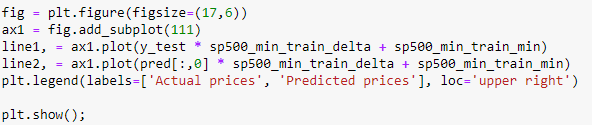

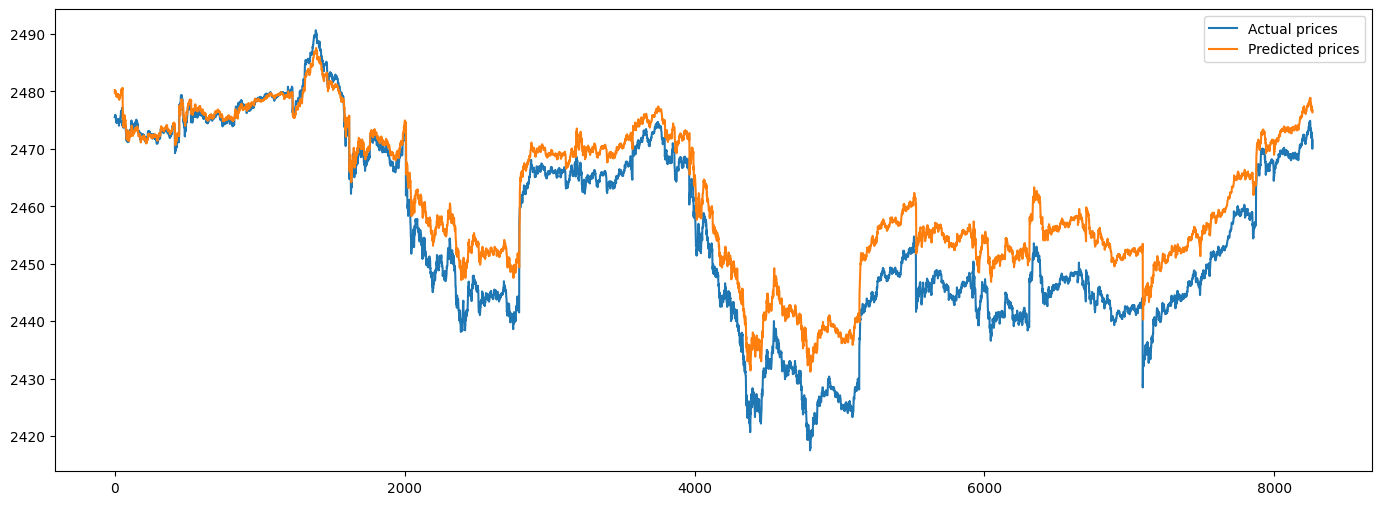

In [53]:
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(111)
line1 = ax1.plot(y_test * sp500_min_train_delta + sp500_min_train_min)
line2, = ax1.plot(pred[:,0] * sp500_min_train_delta + sp500_min_train_min)
plt.legend(labels=['Actual prices', 'Predicted prices'], loc='upper right')

plt.show()

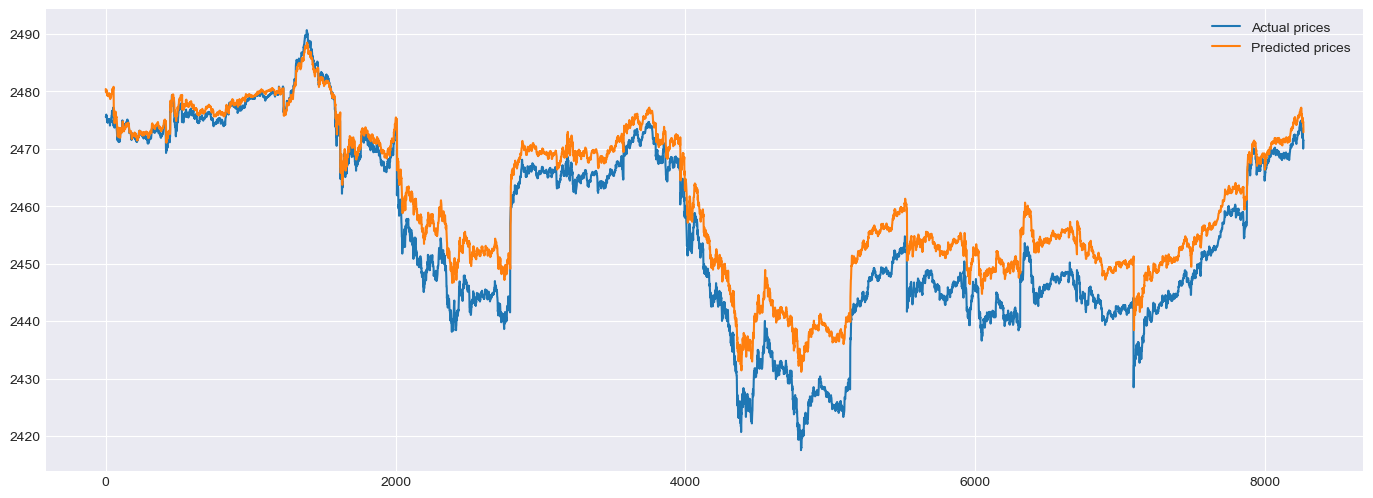

### Error Chart

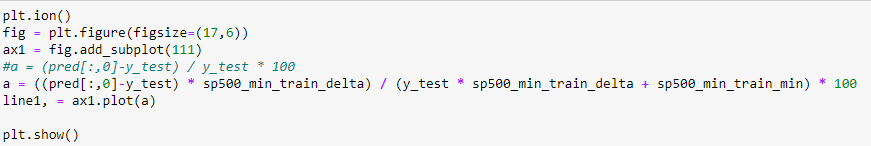

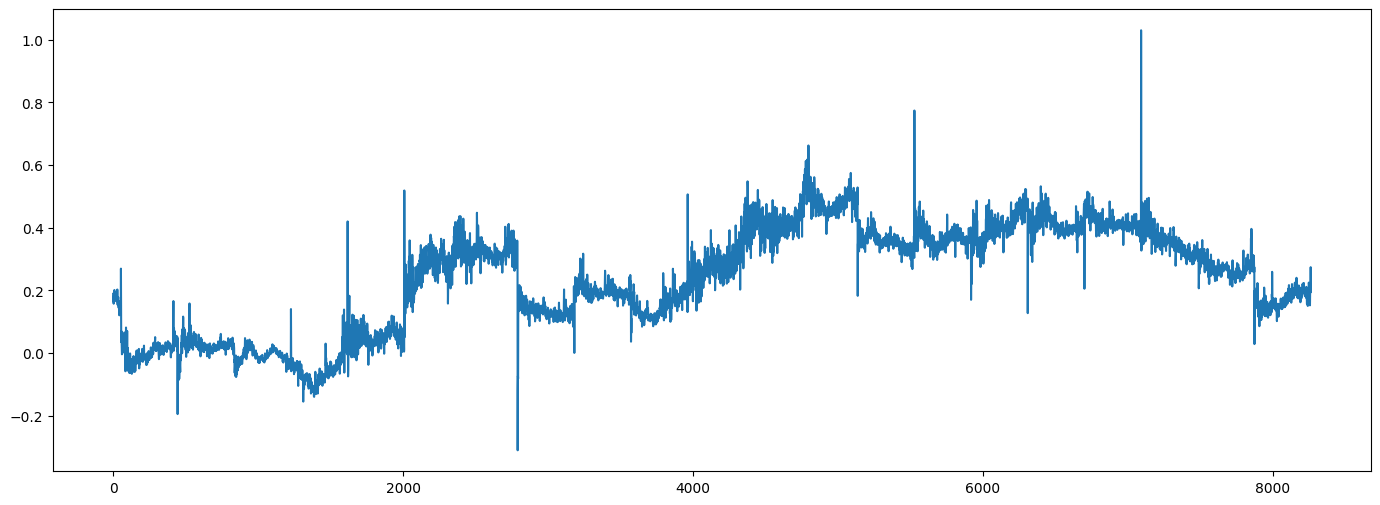

In [54]:
plt.ion()

fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(111)

a = ((pred[:,0] - y_test) * sp500_min_train_delta) / (y_test * sp500_min_train_delta + sp500_min_train_min) * 100
line1, = ax1.plot(a)

plt.show()

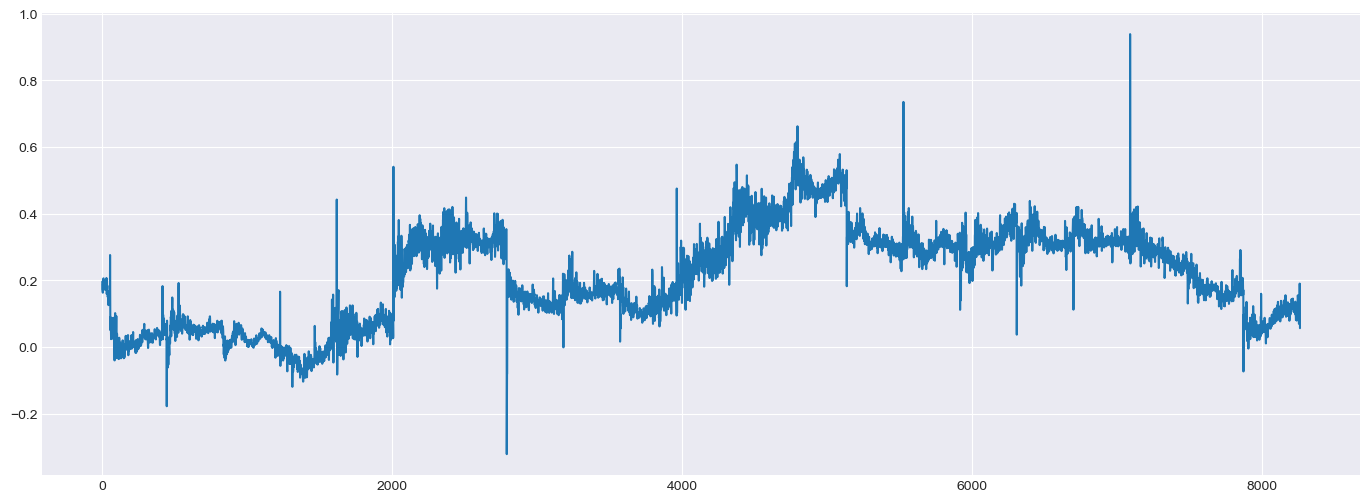